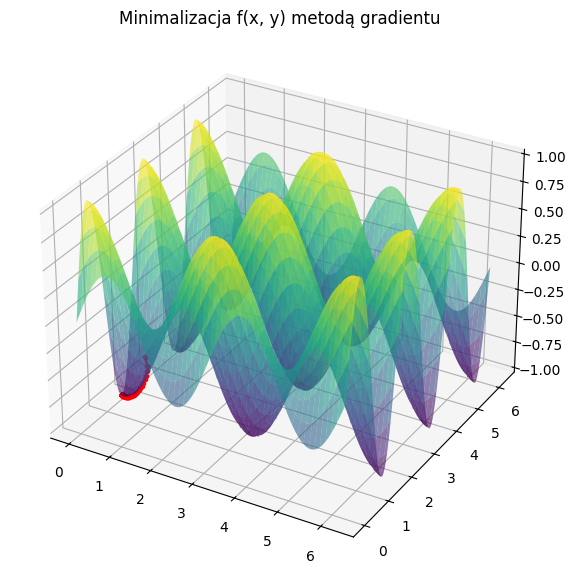

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(x + 3*y) * np.cos(x)

def gradient(x, y):
    df_dx = np.cos(x + 3*y) * np.cos(x) - np.sin(x + 3*y) * np.sin(x)
    df_dy = 3 * np.cos(x + 3*y) * np.cos(x)
    return np.array([df_dx, df_dy])

# Parametry algorytmu
learning_rate = 0.1
iterations = 100
point = np.array([1.0, 1.0])  # Punkt startowy
path = [point.copy()]

for _ in range(iterations):
    grad = gradient(point[0], point[1])
    point -= learning_rate * grad
    path.append(point.copy())

path = np.array(path)

# Wizualizacja 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x_range = np.linspace(0, 2*np.pi, 100)
y_range = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), color='red', marker='o', markersize=3, label='Path')
ax.set_title("Minimalizacja f(x, y) metodą gradientu")
plt.show()

In [5]:
import numpy as np

# Definicje funkcji i ich pochodnych
activations = {
    "tanh": (lambda x: np.tanh(x), lambda x: 1 - np.tanh(x)**2),
    "sigmoid": (lambda x: 1/(1+np.exp(-x)), lambda x: (1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x))))
}

nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "tanh"},
    {"input_dim": 2, "output_dim": 1, "activation": "sigmoid"}
]

def initialize_layers(architecture):
    params = {}
    for idx, layer in enumerate(architecture):
        layer_idx = idx + 1
        params[f"W{layer_idx}"] = np.random.randn(layer["output_dim"], layer["input_dim"]) * 0.1
        params[f"b{layer_idx}"] = np.zeros((layer["output_dim"], 1))
    return params

def calculate_gradients(X, Y, params, architecture):
    memory = {}
    A_curr = X
    
    # Forward Pass
    for idx, layer in enumerate(architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        
        W_curr = params[f"W{layer_idx}"]
        b_curr = params[f"b{layer_idx}"]
        Z_curr = np.dot(W_curr, A_prev) + b_curr
        
        activation_func = activations[layer["activation"]][0]
        A_curr = activation_func(Z_curr)
        
        memory[f"A{idx}"] = A_prev
        memory[f"Z{layer_idx}"] = Z_curr

    # Backward Pass
    grads = {}
    dA_curr = 2 * (A_curr - Y)
    
    for idx, layer in reversed(list(enumerate(architecture))):
        layer_idx = idx + 1
        activation_deriv = activations[layer["activation"]][1]
        
        A_prev = memory[f"A{idx}"]
        Z_curr = memory[f"Z{layer_idx}"]
        W_curr = params[f"W{layer_idx}"]
        
        dZ_curr = dA_curr * activation_deriv(Z_curr)
        
        # Gradienty wag i biasów
        grads[f"dW{layer_idx}"] = np.dot(dZ_curr, A_prev.T)
        grads[f"db{layer_idx}"] = np.sum(dZ_curr, axis=1, keepdims=True)
        
        dA_curr = np.dot(W_curr.T, dZ_curr)
        
    return grads

# Przykład użycia
params = initialize_layers(nn_architecture)
X_test = np.array([[0.5], [-0.2]])
Y_test = np.array([[1.0]])

gradients = calculate_gradients(X_test, Y_test, params, nn_architecture)

print("Obliczone gradienty:")
for key, val in gradients.items():
    print(f"{key}:\n{val}")

Obliczone gradienty:
dW2:
[[-0.01262698  0.0187844 ]]
db2:
[[-0.25092766]]
dW1:
[[ 0.01267519 -0.00507008]
 [-0.00392057  0.00156823]]
db1:
[[ 0.02535038]
 [-0.00784115]]
